
# Sentiment Analysis
You’ll begin by installing some prerequisites, including NLTK itself as well as specific resources you’ll need throughout this tutorial.

First, use pip to install NLTK:

In [1]:
 #python3 -m pip install nltk

In [10]:
import nltk

#### NLTK will display a download manager showing all available and installed resources. Here are the ones you’ll need to download for this tutorial:

names: A list of common English names compiled by Mark Kantrowitz
stopwords: A list of really common words, like articles, pronouns, prepositions, and conjunctions
state_union: A sample of transcribed State of the Union addresses by different US presidents, compiled by Kathleen Ahrens
twitter_samples: A list of social media phrases posted to Twitter
movie_reviews: Two thousand movie reviews categorized by Bo Pang and Lillian Lee
averaged_perceptron_tagger: A data model that NLTK uses to categorize words into their part of speech
vader_lexicon: A scored list of words and jargon that NLTK references when performing sentiment analysis, created by C.J. Hutto and Eric Gilbert
punkt: A data model created by Jan Strunk that NLTK uses to split full texts into word lists

A quick way to download specific resources directly from the console is to pass a list to nltk.download():

In [2]:
nltk.download([
...     "names",
...     "stopwords",
...     "state_union",
...     "twitter_samples",
...     "movie_reviews",
...     "averaged_perceptron_tagger",
...     "vader_lexicon",
...     "punkt",
... ])

[nltk_data] Downloading package names to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sushanth S\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_p

True

In [9]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to C:\Users\Sushanth
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [10]:
from nltk import *

#import tensorflow as tf
#shakespeare_url="https://homl.info/shakespeare"
#filepath=tf.keras.utils.get_file('shakespeare.txt',shakespeare_url)

In [11]:
w = nltk.corpus.movie_reviews.words()

# Compiling Data
NLTK provides a number of functions that you can call with few or no arguments that will help you meaningfully analyze text before you even touch its machine learning capabilities. Many of NLTK’s utilities are helpful in preparing your data for more advanced analysis.

Soon, you’ll learn about frequency distributions, concordance, and collocations. But first, you need some data.

Start by loading the State of the Union corpus you downloaded earlier:

In [12]:
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]

Note that you build a list of individual words with the corpus’s .words() method, but you use str.isalpha() to include only the words that are made up of letters. Otherwise, your word list may end up with “words” that are only punctuation marks.

Have a look at your list. You’ll notice lots of little words like “of,” “a,” “the,” and similar. These common words are called stop words, and they can have a negative effect on your analysis because they occur so often in the text. Thankfully, there’s a convenient way to filter them out.

In [13]:
stopwords = nltk.corpus.stopwords.words("english")

Make sure to specify english as the desired language since this corpus contains stop words in various languages.

Now you can remove stop words from your original word list:

In [14]:
words = [w for w in words if w.lower() not in stopwords]

Since all words in the stopwords list are lowercase, and those in the original list may not be, you use str.lower() to account for any discrepancies. Otherwise, you may end up with mixedCase or capitalized stop words still in your list.

While you’ll use corpora provided by NLTK for this tutorial, it’s possible to build your own text corpora from any source. Building a corpus can be as simple as loading some plain text or as complex as labeling and categorizing each sentence. Refer to NLTK’s documentation for more information on how to work with corpus readers.

For some quick analysis, creating a corpus could be overkill. If all you need is a word list, there are simpler ways to achieve that goal. Beyond Python’s own string manipulation methods, NLTK provides nltk.word_tokenize(), a function that splits raw text into individual words. While tokenization is itself a bigger topic (and likely one of the steps you’ll take when creating a custom corpus), this tokenizer delivers simple word lists really well.

To use it, call word_tokenize() with the raw text you want to split:

In [15]:
from pprint import pprint
text = """For some quick analysis creating a corpus could be overkill"""

In [16]:
pprint(nltk.word_tokenize(text), width=79, compact=True)

['For', 'some', 'quick', 'analysis', 'creating', 'a', 'corpus', 'could', 'be',
 'overkill']


Now you have a workable word list! Remember that punctuation will be counted as individual words, so use str.isalpha() to filter them out later.

# Creating Frequency Distributions
Now you’re ready for frequency distributions. A frequency distribution is essentially a table that tells you how many times each word appears within a given text. In NLTK, frequency distributions are a specific object type implemented as a distinct class called FreqDist. This class provides useful operations for word frequency analysis.

To build a frequency distribution with NLTK, construct the nltk.FreqDist class with a word list:

In [17]:
nltk.word_tokenize(text)
fd = nltk.FreqDist(words)

In [18]:
fd.most_common(10)

[('must', 1568),
 ('people', 1291),
 ('world', 1128),
 ('year', 1097),
 ('America', 1076),
 ('us', 1049),
 ('new', 1049),
 ('Congress', 1014),
 ('years', 827),
 ('American', 784)]

In [19]:
fd.tabulate(10)

    must   people    world     year  America       us      new Congress    years American 
    1568     1291     1128     1097     1076     1049     1049     1014      827      784 


These methods allow you to quickly determine frequently used words in a sample. With .most_common(), you get a list of tuples containing each word and how many times it appears in your text. You can get the same information in a more readable format with .tabulate().

In addition to these two methods, you can use frequency distributions to query particular words. You can also use them as iterators to perform some custom analysis on word properties.

For example, to discover differences in case, you can query for different variations of the same word:

In [20]:
fd["America"]

1076

In [21]:
fd["america"]  # Note this doesn't result in a KeyError

0

In [22]:
fd["AMERICA"]

3

These return values indicate the number of times each word occurs exactly as given.

Since frequency distribution objects are iterable, you can use them within list comprehensions to create subsets of the initial distribution. You can focus these subsets on properties that are useful for your own analysis.

Try creating a new frequency distribution that’s based on the initial one but normalizes all words to lowercase:

In [23]:
lower_fd = nltk.FreqDist([w.lower() for w in fd])

Now you have a more accurate representation of word usage regardless of case.

Think of the possibilities: You could create frequency distributions of words starting with a particular letter, or of a particular length, or containing certain letters. Your imagination is the limit!

# Extracting Concordance and Collocations
In the context of NLP, a concordance is a collection of word locations along with their context. You can use concordances to find:

How many times a word appears
Where each occurrence appears
What words surround each occurrence
In NLTK, you can do this by calling .concordance(). To use it, you need an instance of the nltk.Text class, which can also be constructed with a word list.

Before invoking .concordance(), build a new word list from the original corpus text so that all the context, even stop words, will be there:

In [25]:
text = nltk.Text(nltk.corpus.state_union.words())
text.concordance("america", lines=5)

Displaying 5 of 1079 matches:
 would want us to do . That is what America will do . So much blood has already
ay , the entire world is looking to America for enlightened leadership to peace
beyond any shadow of a doubt , that America will continue the fight for freedom
 to make complete victory certain , America will never become a party to any pl
nly in law and in justice . Here in America , we have labored long and hard to 


Note that .concordance() already ignores case, allowing you to see the context of all case variants of a word in order of appearance. Note also that this function doesn’t show you the location of each word in the text.

Additionally, since .concordance() only prints information to the console, it’s not ideal for data manipulation. To obtain a usable list that will also give you information about the location of each occurrence, use .concordance_list():

In [26]:
concordance_list = text.concordance_list("america", lines=2)
for entry in concordance_list:
    print(entry.line)

 would want us to do . That is what America will do . So much blood has already
ay , the entire world is looking to America for enlightened leadership to peace


.concordance_list() gives you a list of ConcordanceLine objects, which contain information about where each word occurs as well as a few more properties worth exploring. The list is also sorted in order of appearance.

The nltk.Text class itself has a few other interesting features. One of them is .vocab(), which is worth mentioning because it creates a frequency distribution for a given text.

Revisiting nltk.word_tokenize(), check out how quickly you can create a custom nltk.Text instance and an accompanying frequency distribution:

In [29]:
nltk.word_tokenize("""Beautiful is better than ugly.Explicit is better than implicit.Simple is better than complex.""")
text = nltk.Text(words)
fd = text.vocab()  # Equivalent to fd = nltk.FreqDist(words)
fd.tabulate(3)

    is better   than 
     3      3      3 


.vocab() is essentially a shortcut to create a frequency distribution from an instance of nltk.Text. That way, you don’t have to make a separate call to instantiate a new nltk.FreqDist object.

Another powerful feature of NLTK is its ability to quickly find collocations with simple function calls. Collocations are series of words that frequently appear together in a given text. In the State of the Union corpus, for example, you’d expect to find the words United and States appearing next to each other very often. Those two words appearing together is a collocation.

Collocations can be made up of two or more words. NLTK provides classes to handle several types of collocations:

Bigrams: Frequent two-word combinations
Trigrams: Frequent three-word combinations
Quadgrams: Frequent four-word combinations
NLTK provides specific classes for you to find collocations in your text. Following the pattern you’ve seen so far, these classes are also built from lists of words:

In [30]:
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]
finder = nltk.collocations.TrigramCollocationFinder.from_words(words)

The TrigramCollocationFinder instance will search specifically for trigrams. As you may have guessed, NLTK also has the BigramCollocationFinder and QuadgramCollocationFinder classes for bigrams and quadgrams, respectively. All these classes have a number of utilities to give you information about all identified collocations.

One of their most useful tools is the ngram_fd property. This property holds a frequency distribution that is built for each collocation rather than for individual words.

Using ngram_fd, you can find the most common collocations in the supplied text:

In [33]:
finder.ngram_fd.most_common(2)

[(('the', 'United', 'States'), 294), (('the', 'American', 'people'), 185)]

In [34]:
finder.ngram_fd.tabulate(2)

  ('the', 'United', 'States') ('the', 'American', 'people') 
                          294                           185 


You don’t even have to create the frequency distribution, as it’s already a property of the collocation finder instance.

Now that you’ve learned about some of NLTK’s most useful tools, it’s time to jump into sentiment analysis!

# Using NLTK’s Pre-Trained Sentiment Analyzer
NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

Since VADER is pretrained, you can get results more quickly than with many other analyzers. However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. It’s less accurate when rating longer, structured sentences, but it’s often a good launching point.

To use VADER, first create an instance of nltk.sentiment.SentimentIntensityAnalyzer, then use .polarity_scores() on a raw string:

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

You’ll get back a dictionary of different scores. The negative, neutral, and positive scores are related: They all add up to 1 and can’t be negative. The compound score is calculated differently. It’s not just an average, and it can range from -1 to 1.

Now you’ll put it to the test against real data using two different corpora. First, load the twitter_samples corpus into a list of strings, making a replacement to render URLs inactive to avoid accidental clicks:

In [11]:
tweets = [t.replace("://", "//") for t in nltk.corpus.twitter_samples.strings()]

Notice that you use a different corpus method, .strings(), instead of .words(). This gives you a list of raw tweets as strings.

Different corpora have different features, so you may need to use Python’s help(), as in help(nltk.corpus.tweet_samples), or consult NLTK’s documentation to learn how to use a given corpus.

Now use the .polarity_scores() function of your SentimentIntensityAnalyzer instance to classify tweets:

In [12]:
from random import shuffle

def is_positive(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia.polarity_scores(tweet)["compound"] > 0

shuffle(tweets)
for tweet in tweets[:10]:
    print(">", is_positive(tweet), tweet)

> False RT @stardust193: #AskNigelFarage #AskNigel #UKIP #AskFarage #bbcqt  I never go abroad without medical insurance. I'd never expect another c…
> False RT @britainelects: Latest YouGov poll (29 - 30 Apr):
LAB - 35% (+1)
CON - 34% (-1)
UKIP - 12% (-)
LDEM - 8% (-1) 
GRN - 5% (+1)
> True Great statement about our ex-servicemen &amp; women by @Nigel_Farage about time the rest of them started doing more  #UKIP #AskNigelFarage
> True @ruth_wishart @linannlum imply is an understatement. Hard to see any way back from his garbage. He must have bet Tories are going to win.
> True RT @agwhitchurch: Now we know the only way to an economist backed anti-austerity government is SNP, Plaid Cymru &amp; Green coalition https//t…
> False "Die Foreigners! Die!" Farage - #election2015
> True RT @BBCDouglasF: Miliband gift to SNP: I'd rather Tories in power than any SNP deal with Labour (works in England, unlikely to do so in Sco…
> False I am the first person to make twinx cry as a 16 year old :)))
>

In this case, is_positive() uses only the positivity of the compound score to make the call. You can choose any combination of VADER scores to tweak the classification to your needs.

Now take a look at the second corpus, movie_reviews. As the name implies, this is a collection of movie reviews. The special thing about this corpus is that it’s already been classified. Therefore, you can use it to judge the accuracy of the algorithms you choose when rating similar texts.

Keep in mind that VADER is likely better at rating tweets than it is at rating long movie reviews. To get better results, you’ll set up VADER to rate individual sentences within the review rather than the entire text.

Since VADER needs raw strings for its rating, you can’t use .words() like you did earlier. Instead, make a list of the file IDs that the corpus uses, which you can use later to reference individual reviews:

In [13]:
positive_review_ids = nltk.corpus.movie_reviews.fileids(categories=["pos"])
negative_review_ids = nltk.corpus.movie_reviews.fileids(categories=["neg"])
all_review_ids = positive_review_ids + negative_review_ids

.fileids() exists in most, if not all, corpora. In the case of movie_reviews, each file corresponds to a single review. Note also that you’re able to filter the list of file IDs by specifying categories. This categorization is a feature specific to this corpus and others of the same type.

Next, redefine is_positive() to work on an entire review. You’ll need to obtain that specific review using its file ID and then split it into sentences before rating:

In [14]:
from statistics import mean

def is_positive(review_id: str) -> bool:
    """True if the average of all sentence compound scores is positive."""
    text = nltk.corpus.movie_reviews.raw(review_id)
    scores = [
        sia.polarity_scores(sentence)["compound"]
        for sentence in nltk.sent_tokenize(text)
    ]
    return mean(scores) > 0

.raw() is another method that exists in most corpora. By specifying a file ID or a list of file IDs, you can obtain specific data from the corpus. Here, you get a single review, then use nltk.sent_tokenize() to obtain a list of sentences from the review. Finally, is_positive() calculates the average compound score for all sentences and associates a positive result with a positive review.

You can take the opportunity to rate all the reviews and see how accurate VADER is with this setup:

In [15]:
shuffle(all_review_ids)
correct = 0
for review_id in all_review_ids:
     if is_positive(review_id):
         if review_id in positive_review_ids:
             correct += 1
     else:
         if review_id in negative_review_ids:
             correct += 1

print(F"{correct / len(all_review_ids):.2%} correct")


64.00% correct


After rating all reviews, you can see that only 64 percent were correctly classified by VADER using the logic defined in is_positive().

A 64 percent accuracy rating isn’t great, but it’s a start. Have a little fun tweaking is_positive() to see if you can increase the accuracy.

In the next section, you’ll build a custom classifier that allows you to use additional features for classification and eventually increase its accuracy to an acceptable level.

# Customizing NLTK’s Sentiment Analysis
NLTK offers a few built-in classifiers that are suitable for various types of analyses, including sentiment analysis. The trick is to figure out which properties of your dataset are useful in classifying each piece of data into your desired categories.

In the world of machine learning, these data properties are known as features, which you must reveal and select as you work with your data. While this tutorial won’t dive too deeply into feature selection and feature engineering, you’ll be able to see their effects on the accuracy of classifiers.

Selecting Useful Features
Since you’ve learned how to use frequency distributions, why not use them as a launching point for an additional feature?

By using the predefined categories in the movie_reviews corpus, you can create sets of positive and negative words, then determine which ones occur most frequently across each set. Begin by excluding unwanted words and building the initial category groups:



In [16]:
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

def skip_unwanted(pos_tuple):
    word, tag = pos_tuple
    if not word.isalpha() or word in unwanted:
        return False
    if tag.startswith("NN"):
        return False
    return True

positive_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["pos"]))
)]
negative_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["neg"]))
)]

This time, you also add words from the names corpus to the unwanted list on line 2 since movie reviews are likely to have lots of actor names, which shouldn’t be part of your feature sets. Notice pos_tag() on lines 14 and 18, which tags words by their part of speech.

It’s important to call pos_tag() before filtering your word lists so that NLTK can more accurately tag all words. skip_unwanted(), defined on line 4, then uses those tags to exclude nouns, according to NLTK’s default tag set.

Now you’re ready to create the frequency distributions for your custom feature. Since many words are present in both positive and negative sets, begin by finding the common set so you can remove it from the distribution objects:

In [17]:
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)

common_set = set(positive_fd).intersection(negative_fd)

for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

top_100_positive = {word for word, count in positive_fd.most_common(100)}
top_100_negative = {word for word, count in negative_fd.most_common(100)}

In [26]:
from nltk import FreqDist
frequency_distribution = FreqDist(positive_fd)

In [27]:
frequency_distribution.most_common(20)

[('shrek', 23),
 ('fei', 22),
 ('ordell', 20),
 ('soviet', 16),
 ('kimble', 16),
 ('en', 14),
 ('addresses', 14),
 ('lovingly', 14),
 ('nello', 14),
 ('horned', 13),
 ('kudos', 12),
 ('supreme', 12),
 ('flynt', 12),
 ('conveys', 11),
 ('narrates', 11),
 ('broadcast', 11),
 ('masterfully', 11),
 ('criticized', 10),
 ('apostle', 10),
 ('argento', 10)]

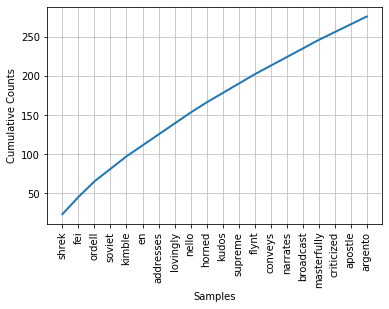

In [29]:
frequency_distribution.plot(20, cumulative=True)

Once you’re left with unique positive and negative words in each frequency distribution object, you can finally build sets from the most common words in each distribution. The amount of words in each set is something you could tweak in order to determine its effect on sentiment analysis.

This is one example of a feature you can extract from your data, and it’s far from perfect. Looking closely at these sets, you’ll notice some uncommon names and words that aren’t necessarily positive or negative. Additionally, the other NLTK tools you’ve learned so far can be useful for building more features. One possibility is to leverage collocations that carry positive meaning, like the bigram “thumbs up!”

Here’s how you can set up the positive and negative bigram finders:

In [30]:
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

positive_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    w for w in nltk.corpus.movie_reviews.words(categories=["pos"])
    if w.isalpha() and w not in unwanted
])
negative_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    w for w in nltk.corpus.movie_reviews.words(categories=["neg"])
    if w.isalpha() and w not in unwanted
])

The rest is up to you! Try different combinations of features, think of ways to use the negative VADER scores, create ratios, polish the frequency distributions. The possibilities are endless!

Training and Using a Classifier
With your new feature set ready to use, the first prerequisite for training a classifier is to define a function that will extract features from a given piece of data.

Since you’re looking for positive movie reviews, focus on the features that indicate positivity, including VADER scores:

In [31]:
def extract_features(text):
    features = dict()
    wordcount = 0
    compound_scores = list()
    positive_scores = list()

    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in top_100_positive:
                wordcount += 1
        compound_scores.append(sia.polarity_scores(sentence)["compound"])
        positive_scores.append(sia.polarity_scores(sentence)["pos"])

    # Adding 1 to the final compound score to always have positive numbers
    # since some classifiers you'll use later don't work with negative numbers.
    features["mean_compound"] = mean(compound_scores) + 1
    features["mean_positive"] = mean(positive_scores)
    features["wordcount"] = wordcount

    return features

extract_features() should return a dictionary, and it will create three features for each piece of text:

The average compound score
The average positive score
The amount of words in the text that are also part of the top 100 words in all positive reviews
In order to train and evaluate a classifier, you’ll need to build a list of features for each text you’ll analyze:

In [32]:
features = [
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "pos")
    for review in nltk.corpus.movie_reviews.fileids(categories=["pos"])
]
features.extend([
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "neg")
    for review in nltk.corpus.movie_reviews.fileids(categories=["neg"])
])

Each item in this list of features needs to be a tuple whose first item is the dictionary returned by extract_features and whose second item is the predefined category for the text. After initially training the classifier with some data that has already been categorized (such as the movie_reviews corpus), you’ll be able to classify new data.

Training the classifier involves splitting the feature set so that one portion can be used for training and the other for evaluation, then calling .train():


In [33]:
# Use 1/4 of the set for training
train_count = len(features) // 4
shuffle(features)
classifier = nltk.NaiveBayesClassifier.train(features[:train_count])
classifier.show_most_informative_features(10)

nltk.classify.accuracy(classifier, features[train_count:])

Most Informative Features
               wordcount = 3                 pos : neg    =     11.3 : 1.0
               wordcount = 2                 pos : neg    =      3.1 : 1.0
               wordcount = 0                 neg : pos    =      1.9 : 1.0
               wordcount = 1                 pos : neg    =      1.7 : 1.0
           mean_positive = 0.09671052631578947    pos : neg    =      1.0 : 1.0
           mean_positive = 0.159             pos : neg    =      1.0 : 1.0


0.6566666666666666

Since you’re shuffling the feature list, each run will give you different results. In fact, it’s important to shuffle the list to avoid accidentally grouping similarly classified reviews in the first quarter of the list.

Adding a single feature has marginally improved VADER’s initial accuracy, from 64 percent to 67 percent. More features could help, as long as they truly indicate how positive a review is. You can use classifier.show_most_informative_features() to determine which features are most indicative of a specific property.

To classify new data, find a movie review somewhere and pass it to classifier.classify(). You can also use extract_features() to tell you exactly how it was scored:

Was it correct? Based on the scoring output from extract_features(), what can you improve?

Feature engineering is a big part of improving the accuracy of a given algorithm, but it’s not the whole story. Another strategy is to use and compare different classifiers.

# Comparing Additional Classifiers
NLTK provides a class that can use most classifiers from the popular machine learning framework scikit-learn.

Many of the classifiers that scikit-learn provides can be instantiated quickly since they have defaults that often work well. In this section, you’ll learn how to integrate them within NLTK to classify linguistic data.

Installing and Importing scikit-learn
Like NLTK, scikit-learn is a third-party Python library, so you’ll have to install it with pip:

In [34]:
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Progra

With these classifiers imported, you’ll first have to instantiate each one. Thankfully, all of these have pretty good defaults and don’t require much tweaking.

To aid in accuracy evaluation, it’s helpful to have a mapping of classifier names and their instances

In [35]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

Now you can use these instances for training and accuracy evaluation.

Using scikit-learn Classifiers With NLTK
Since NLTK allows you to integrate scikit-learn classifiers directly into its own classifier class, the training and classification processes will use the same methods you’ve already seen, .train() and .classify().

You’ll also be able to leverage the same features list you built earlier by means of extract_features(). To refresh your memory, here’s how you built the features list:

In [36]:
features = [
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "pos")
    for review in nltk.corpus.movie_reviews.fileids(categories=["pos"])
]
features.extend([
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "neg")
    for review in nltk.corpus.movie_reviews.fileids(categories=["neg"])
])

The features list contains tuples whose first item is a set of features given by extract_features(), and whose second item is the classification label from preclassified data in the movie_reviews corpus.

Since the first half of the list contains only positive reviews, begin by shuffling it, then iterate over all classifiers to train and evaluate each one:

In [37]:
# Use 1/4 of the set for training
train_count = len(features) // 4
shuffle(features)
for name, sklearn_classifier in classifiers.items():
    classifier = nltk.classify.SklearnClassifier(sklearn_classifier)
    classifier.train(features[:train_count])
    accuracy = nltk.classify.accuracy(classifier, features[train_count:])
    print(F"{accuracy:.2%} - {name}")

66.67% - BernoulliNB
65.93% - ComplementNB
66.27% - MultinomialNB
68.00% - KNeighborsClassifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https:

62.00% - DecisionTreeClassifier
65.33% - RandomForestClassifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curr

70.67% - LogisticRegression
73.27% - MLPClassifier
71.40% - AdaBoostClassifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:749: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.array(y > threshold, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

For each scikit-learn classifier, call nltk.classify.SklearnClassifier to create a usable NLTK classifier that can be trained and evaluated exactly like you’ve seen before with nltk.NaiveBayesClassifier and its other built-in classifiers. The .train() and .accuracy() methods should receive different portions of the same list of features.

Now you’ve reached over 73 percent accuracy before even adding a second feature! While this doesn’t mean that the MLPClassifier will continue to be the best one as you engineer new features, having additional classification algorithms at your disposal is clearly advantageous.